<a href="https://colab.research.google.com/github/BKover99/Pseudovisium/blob/main/Paper%20figures/Fig3_Pseudovisium_vs_real_Visium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing packages and downloading the dataset excel file.

In [1]:
!wget https://github.com/BKover99/Pseudovisium/raw/main/Datasets_all.xlsx
!pip install Pseudovisium -q
!pip install spatialAUC -q

--2024-06-18 15:06:20--  https://github.com/BKover99/Pseudovisium/raw/main/Datasets_all.xlsx
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BKover99/Pseudovisium/main/Datasets_all.xlsx [following]
--2024-06-18 15:06:20--  https://raw.githubusercontent.com/BKover99/Pseudovisium/main/Datasets_all.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42301 (41K) [application/octet-stream]
Saving to: ‘Datasets_all.xlsx’

Datasets_all.xlsx   100%[===================>]  41.31K  --.-KB/s    in 0.04s   

2024-06-18 15:06:21 (1012 KB/s) - ‘Datasets_all.xlsx’ saved [42301/42301]

     ━━━━━━━━━━━━━━━━━━

Extracting the datasets used in this notebook

In [7]:
import pandas as pd
datasets = pd.read_excel("/content/Datasets_all.xlsx")
datasets_to_load = datasets[datasets["Visium_xenium_notebook"]==1]
datasets_to_load

Author  Year                                   Paper_DOI  \
11  Denisenko et al.  2024             DOI: 10.1038/s41467-024-47271-y   
12  Denisenko et al.  2024             DOI: 10.1038/s41467-024-47271-y   
26               10X  2023  https://doi.org/10.1038/s41467-023-43458-x   
29   Janesick et al.  2023  https://doi.org/10.1038/s41467-023-43458-x   

                                      Link_to_dataset  \
11                https://zenodo.org/records/10048057   
12  https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...   
26                                                NaN   
29                                                NaN   

                                        Onedrive_link  \
11  https://cw1oqa.bl.files.1drv.com/y4ms839bushVl...   
12  https://zm1oqa.bl.files.1drv.com/y4mg6GhhT2pXj...   
26  https://mz24iq.bl.files.1drv.com/y4mNobvja4Uwu...   
29  https://cpl1ng.bl.files.1drv.com/y4mDMy6l7qZvS...   

                           Name Technology          Tissue Species  \
11                CosMx_ovarian      CosMx  Ovarian_cancer   Human   
12               Visium_ovarian     Visium  Ovarian_cancer   Human   
26  Xenium_breast_Sample_1_rep1     Xenium   Breast cancer   Human   
29       Visium_breast_Sample_1     Visium   Breast cancer   Human   

    Visium_xenium_notebook  PV_workflow_comparison  Comparing_all_tech  \
11                       1                       0                   1   
12                       1                       0                   1   
26                       1                       1                   1   
29                       1                       0                   1   

    Pulmonary Xenium  Cosmx_lung  Dataset_merge_visium  Brain case study  \
11                 0           0                     0                 0   
12                 0           0                     0                 0   
26                 0           0                     0                 0   
29                 0           0                     0                 0   

    Just Visium example  
11                    0  
12                    0  
26                    0  
29                    0

Downloading the datasets

In [3]:
datasets = pd.read_excel("/content/Datasets_all.xlsx")
datasets_to_load = datasets[datasets["Visium_xenium_notebook"]==1]
import os
from subprocess import call

for i in datasets_to_load["Onedrive_link"]:
    print(i)
    filename = i.split("com/")[-1]

    # Download the file
    download_command = f"wget {i}"
    call(download_command, shell=True)

    # Try unzipping
    unzip_command = f"unzip -q {filename}"
    result = call(unzip_command, shell=True)

    # If unzipping fails, try gunzipping
    if result != 0:
        gunzip_command = f"gunzip {filename}"
        gunzip_result = call(gunzip_command, shell=True)

        # If gunzipping fails, try untarring
        if gunzip_result != 0:
            tar_command = f"tar -xvf {filename}"
            call(tar_command, shell=True)

    # Remove the source zip file
    os.remove(filename)


https://cw1oqa.bl.files.1drv.com/y4ms839bushVlMVuUlw2uCByO4VXwsgOAhy-ao2lOPumNVphhoXv8NQ0zocupGBLVlySH2HjkoXHCGQccXR2LS7uhQr5AaYLncBdQAN3z_5i98WcQ_tvnSCAzYmTetN5zbtIikutZzU7MpVjq1ffQBx_vcfNc3NVZSAyJHbuj9jiBC93D_iyTR_Cz1vvnFD4PtzfmS6NPpY-3nYYEmJaIfOWA
https://zm1oqa.bl.files.1drv.com/y4mg6GhhT2pXjR8Z07n6MfT1x_8KfVoMGXyqQVY6Iz2ttKka4oSddm8j-6D6BR2BZbaYurMp-0piwHKUNbMXyvmQYZA7o08bKmWgqmS6UZjMMKkU0gUayVX0Q1nWzF3EUg61_KZyFhsZ6pHZEWW68_4bU6E0MzUfykQl8VC1B8K2ZlJ3oNvoV3aDwuE7rUr-44eOixp552swhUzAwpfVHJTNQ
https://mz24iq.bl.files.1drv.com/y4mNobvja4UwuikWb1B1AuTNuFonILZreiw0X__lj1XktW0C7cfWv6ruuG8C6mKu8opT-PwOFX2SzNRyNDreijZOuGA7Vh35LDwdb3HitxR1A0G0iP_WopEreFPkazDhVjJmDHP7MITBt4BO6aYCLsVvshToVTvvek4P12iDRiOz51sxwHMlVdEf9BYaVxl6BP5d7HmEb7-htMzlxP7rNbFXw
https://cpl1ng.bl.files.1drv.com/y4mDMy6l7qZvSj1vUyjQfT5QyCqN64u8WQ5thldxVgUVI2llYdJyeqSdUXYa-xom8upo_Z4AuhrFPqQDcMrBg9yk1VSMYpI8QiMqwU-lVLzPoiJ5j4tdLE4TFOx4T3xX06kUjjX-HjbSwPR8X6ADx74gE7eY8Dhu611om1LaLD-8OBESU5TENz8l_f7TQXoCp6kV93n6H1feyMeZhaH2jq

## First comparison of Xenium-Visium data

Loading pseudovisium_generate

In [4]:
from Pseudovisium.pseudovisium_generate import generate_pv
import pandas as pd

Performing the hexagonal binning with Pseudovisium generate

In [ ]:
csv_file="/content/outs_rep1/transcripts.csv"
output_path="/content/"
hexagon_size=50

pseudovisium_path = generate_pv(csv_file=csv_file,
                                hexagon_size=hexagon_size,
                                output_path=output_path,
                                batch_size=2000000,
                                technology="Xenium",
                                spot_diameter=65.0,
                                max_workers=10,
                                quality_filter=True,
                                quality_per_hexagon=True,
                                quality_per_probe=True,
                                project_name='xenium_breast_rep1')

You are using version:  ['Pseudovisium==0.0.42']
Date:  2024-06-18
Technology is Xenium. Going forward with default column names.
Quality filter is set to True
Quality counting per hexagon is set to True
Quality counting per probe is set to True
Visium-like spots are going to be used rather than hexagonal tesselation!!!
Created temporary directory /tmp/tmp_hexa9aw3ecx7
Now creating batches
Created batch 1
Created batch 2
Created batch 3
Created batch 4
Created batch 5
Created batch 6
Created batch 7
Created batch 8
Created batch 9
Created batch 10
Created batch 11
Created batch 12


Loading the utilities required for analysis

In [10]:
import squidpy as sq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import anndata
import geopandas as gpd
import scanpy as sc
np.random.seed(42)

Loading the real visium data. The distances in the spatial coordinates are normalised by the "known" diameter of spots in ums. Note that apparently 10X Visium array spots vary quite a lot, even though they are often advertised as 55um diameter. Here the value of 65 worked well, in that the converted coordinates then nicely align with that of the Xenium data.

In [91]:
#load visium
visium = sq.read.visium("/content/visium")
spot_diameter_fullres = visium.uns["spatial"]['CytAssist_FFPE_Human_Breast_Cancer']['scalefactors']['spot_diameter_fullres']
spot_real_diameter_um = 65
um_per_pixel = spot_real_diameter_um / spot_diameter_fullres
visium.uns["spatial"]['CytAssist_FFPE_Human_Breast_Cancer']['scalefactors']['spot_diameter_fullres'] = spot_real_diameter_um
#in visium.obsm['spatial'] multiply by um_per_pixel to get the real coordinates
visium.obsm['spatial'] = visium.obsm['spatial'] * um_per_pixel #converting to um

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Loading the pseudovisium data.

In [92]:
# load in /Users/k23030440/Library/CloudStorage/OneDrive-King'sCollegeLondon/colab/pseudovisium/xenium_breast_rep1
pseudovisium = sq.read.visium("/content/pseudovisium/xenium_breast_rep1",library_id="Xenium")

Looking at the number of cells contributing to the expression of a spot.

19.0
20.59875647668394


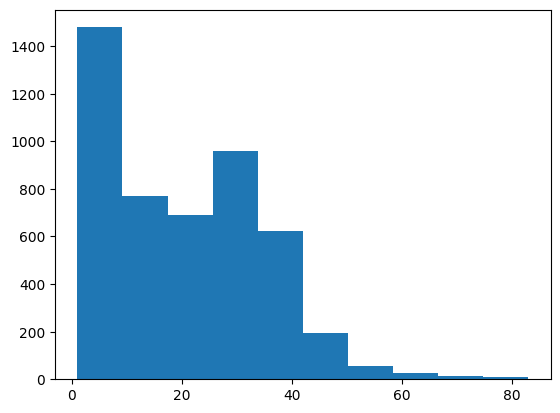

In [93]:
#counting the median number of cells contributing to each spot
pv_cell_hex = pd.read_csv('/content/pseudovisium/xenium_breast_rep1/spatial/pv_cell_hex.csv',header=None)
pv_cell_hex.columns = ["cell_id","Hex_id","count"]
#plot hist
plt.hist(pv_cell_hex.groupby("Hex_id").count()["cell_id"].values)
print(np.median(pv_cell_hex.groupby("Hex_id").count()["cell_id"].values))
print(np.mean(pv_cell_hex.groupby("Hex_id").count()["cell_id"].values))


For the rest of the analysis we restrict the two datasets to shared genes, given that Visium samples the entire transcriptome, while Xenium only looks at around 300 genes.

In [94]:
#Keep only the same genes
shared_genes=np.intersect1d(visium.var.index,pseudovisium.var.index)
pseudovisium_indices = np.where(np.isin(pseudovisium.var.index, shared_genes))[0]
visium_indices = np.where(np.isin(visium.var.index, shared_genes))[0]

pseudovisium = pseudovisium[:, pseudovisium_indices]
visium = visium[:, visium_indices]

Plotting the number of transcripts and unique transcripts per cell.

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_qc.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_qc.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics


<Axes: title={'center': 'PV - Unique transcripts per cell'}, xlabel='n_genes_by_counts', ylabel='Count'>

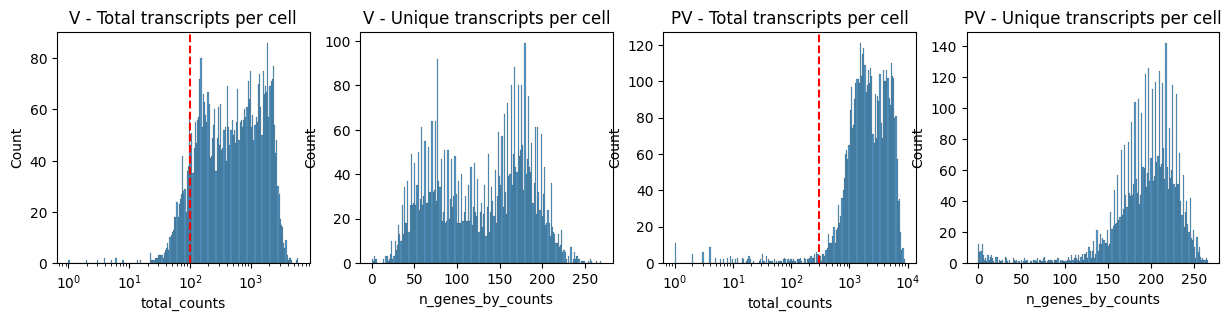

In [95]:
sc.pp.calculate_qc_metrics(visium, percent_top=(50, 100, 200), inplace=True)
sc.pp.calculate_qc_metrics(pseudovisium, percent_top=(50, 100, 200), inplace=True)

fig, axs = plt.subplots(1, 4, figsize=(15, 3))
import seaborn as sns

axs[0].set_title("V - Total transcripts per cell")
sns.histplot(
    visium.obs["total_counts"],
    kde=False,
    ax=axs[0],bins=200,log_scale=True
)
axs[0].axvline(100, color="red", linestyle="--")


axs[1].set_title("V - Unique transcripts per cell")
sns.histplot(
    visium.obs["n_genes_by_counts"],
    kde=False,
    ax=axs[1],bins=200
)
axs[2].set_title("PV - Total transcripts per cell")
sns.histplot(
    pseudovisium.obs["total_counts"],
    kde=False,
    ax=axs[2],bins=200,log_scale=True
)
axs[2].axvline(300, color="red", linestyle="--")

axs[3].set_title("PV - Unique transcripts per cell")
sns.histplot(
    pseudovisium.obs["n_genes_by_counts"],
    kde=False,
    ax=axs[3],bins=200
)





Plotting the spatial coordinates of the two datasets. We immediately see that there are slight differences in dimensions.

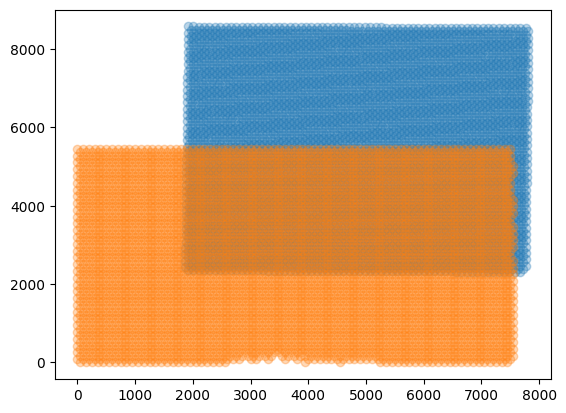

In [96]:
plt.scatter(visium.obsm["spatial"][:,0],visium.obsm["spatial"][:,1],alpha=0.3)
plt.scatter(pseudovisium.obsm["spatial"][:,0],pseudovisium.obsm["spatial"][:,1],alpha=0.3)

The datasets are rotated and transformed to represent the same tissue region.

In [97]:
coords = visium.obsm["spatial"]
#rotate these by left by 90 degrees
coords = np.array([coords[:,1],-coords[:,0]]).T
#add the minimum value's absolute value to all entries in coords[:,1]
coords[:,1]=coords[:,1]+abs(min(coords[:,1]))
#and now upside down
visium.obsm["spatial"]= coords


We know trim the ends of the datasets to make it even more similar. Sum of counts in the tissue is then plotted and we can see the similar structure popping up.

<ipython-input-98-62e1367d1dcc>:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  visium.obs["sum"]=visium.X.sum(axis=1)
<ipython-input-98-62e1367d1dcc>:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  pseudovisium.obs["sum"]=pseudovisium.X.sum(axis=1)


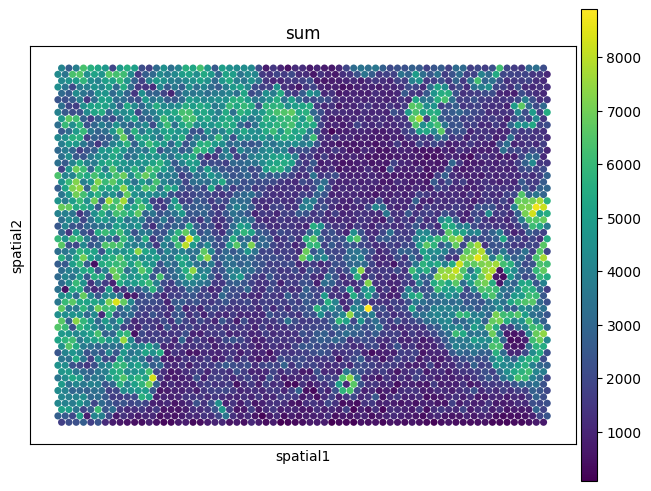

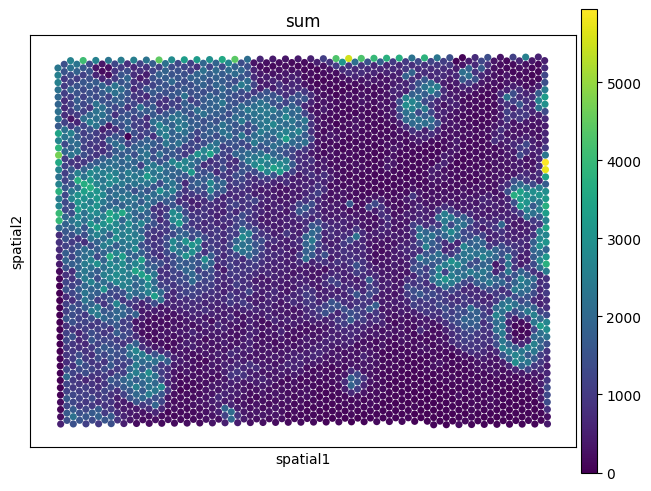

In [98]:

#visium remove entries where y<500
visium = visium[visium.obsm["spatial"][:,1]<4700,]

#remove right max- 500
pseudovisium = pseudovisium[pseudovisium.obsm["spatial"][:,0]<7000,]
pseudovisium = pseudovisium[pseudovisium.obsm["spatial"][:,1]>600,]
pseudovisium = pseudovisium[pseudovisium.obsm["spatial"][:,0]>200,]
pseudovisium = pseudovisium[pseudovisium.obsm["spatial"][:,1]<5500,]

visium.obs["sum"]=visium.X.sum(axis=1)
pseudovisium.obs["sum"]=pseudovisium.X.sum(axis=1)

sq.pl.spatial_scatter(pseudovisium, color="sum", cmap="viridis", img=False,size=1.5)
sq.pl.spatial_scatter(visium, color="sum", cmap="viridis", img=False,size=1.4)

When plotting the spatial coordinates, despite the different actual values for these coordinates, we see that the datasets now roughly comprise the same dimensions

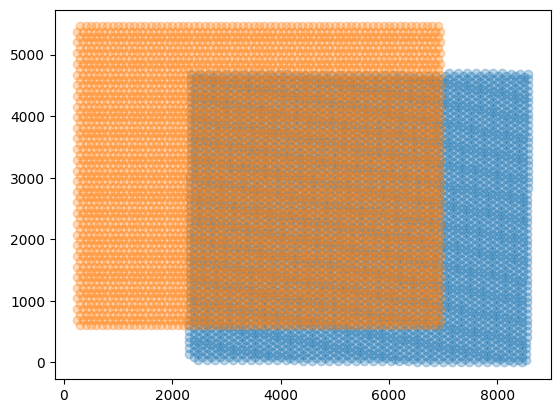

In [99]:
plt.scatter(visium.obsm["spatial"][:,0],visium.obsm["spatial"][:,1],alpha=0.3)
plt.scatter(pseudovisium.obsm["spatial"][:,0],pseudovisium.obsm["spatial"][:,1],alpha=0.3)

Plotting the empirical cumulative distribution function of counts. If you don't know what an ECDF is, check http://bebi103.caltech.edu.s3-website-us-east-1.amazonaws.com/2019a/content/lessons/lesson_03/visualizing_distributions.html?highlight=ecdf#ECDFs.

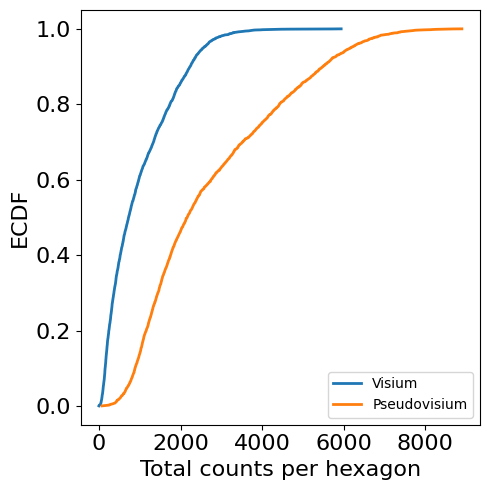

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined visium and pseudovisium DataFrames

x_v = np.sort(visium.obs["sum"])
y_v = np.arange(1, len(x_v)+1) / len(x_v)
x_pv = np.sort(pseudovisium.obs["sum"])
y_pv = np.arange(1, len(x_pv)+1) / len(x_pv)

plt.figure(figsize=(5, 5))  # Decrease figure size
plt.plot(x_v, y_v, label="Visium", lw=2)
plt.plot(x_pv, y_pv, label="Pseudovisium", lw=2)

plt.xlabel("Total counts per hexagon",fontsize=16)  # Add x-axis label
plt.ylabel("ECDF",fontsize=16)  # Add y-axis label

plt.tick_params(axis='both', which='major', labelsize=16)  # Increase tick size


plt.legend()
plt.tight_layout()
plt.savefig("cumulative_proportion.png", dpi=300)

# Save the plot as SVG
plt.savefig("cumulative_proportion.svg")
plt.show()

Now that we studied the raw counts, let's filter the data before further analysis. We will remove low-expression spots/hexagons as well as sparsely expressed genes.

In [101]:
sc.pp.filter_cells(pseudovisium, min_counts=300)
sc.pp.filter_genes(pseudovisium, min_cells=30)
sc.pp.filter_cells(visium, min_counts=100)
sc.pp.filter_genes(visium, min_cells=30)

While we tried our best to make the two datasets/tissues match as much as possible, they will still differ somewhat. To control for that, we will normalise the overall expression of genes by the number of spots/hexagons in the datasets.

In [102]:
n_spots_pv = pseudovisium.shape[0]
n_spots_v = visium.shape[0]

Plotting the normalised (mean) abundance of genes as a comparison between Pseudovisium and Visium.

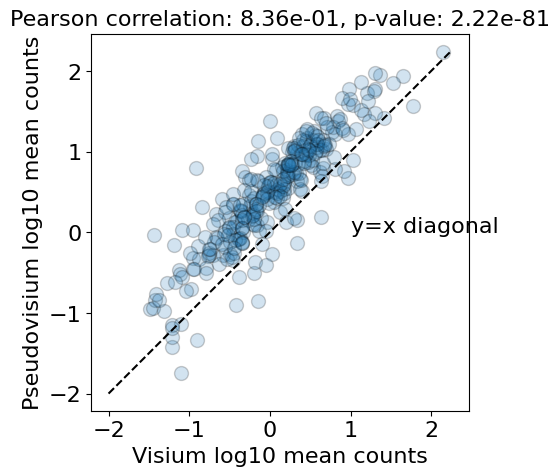

In [103]:
import scipy.stats
means_v = []
means_pv = []
shared_genes = np.intersect1d(visium.var.index,pseudovisium.var.index)
for gene in shared_genes:
    means_v.append(visium[:, gene].X.sum()/n_spots_v)
    means_pv.append(pseudovisium[:, gene].X.sum()/n_spots_pv)

fig, ax = plt.subplots(figsize=(5, 5))

plt.scatter(np.log10(means_v), np.log10(means_pv),alpha=0.2,edgecolors="black", s=100)
plt.xlabel("Visium log10 mean counts",fontsize=16)
plt.ylabel("Pseudovisium log10 mean counts",fontsize=16)
#add diagonal line
plt.plot([-2, 2.25], [-2, 2.25] , color="black", linestyle="--")
#make plot square
plt.gca().set_aspect('equal', adjustable='box')
pearson_r, pearson_p = scipy.stats.pearsonr(means_v, means_pv)
#print in scientific notation
plt.title(f"Pearson correlation: {pearson_r:.2e}, p-value: {pearson_p:.2e}", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
#with red show diagonal line
plt.text(1, 0, "y=x diagonal", color="black", fontsize=16)

plt.tight_layout()
plt.savefig("pv_xenium_v_means.png", dpi=300)

# Save the plot as SVG
plt.savefig("pv_xenium_v_means.svg")
plt.show()

We will now normalise the actual counts before continuing with further analysis.

In [104]:
sc.pp.normalize_total(visium, target_sum=1e4)
sc.pp.normalize_total(pseudovisium, target_sum=1e4)


We see that once counts are normalised, of course gene expression becomes more similar in terms of actual count values. (This in itself isn't that interesting, but is a good sanity check nevertheless).

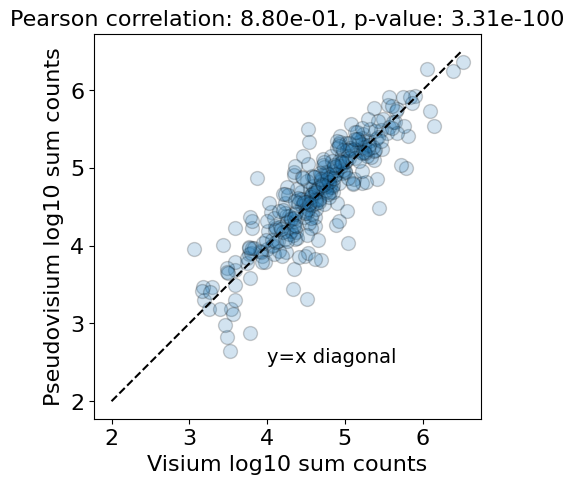

In [105]:
import scipy.stats
means_v = []
means_pv = []
shared_genes = np.intersect1d(visium.var.index,pseudovisium.var.index)
for gene in shared_genes:
    means_v.append(visium[:, gene].X.sum())
    means_pv.append(pseudovisium[:, gene].X.sum())

fig, ax = plt.subplots(figsize=(5, 5))

plt.scatter(np.log10(means_v), np.log10(means_pv),alpha=0.2,edgecolors="black", s=100)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel("Visium log10 sum counts",fontsize=16)
plt.ylabel("Pseudovisium log10 sum counts",fontsize=16)
#add diagonal line
plt.plot([2, 6.5], [2, 6.5],  color="black", linestyle="--")
#make plot square
plt.gca().set_aspect('equal', adjustable='box')
pearson_r, pearson_p = scipy.stats.pearsonr(means_v, means_pv)
#print in scientific notation
plt.title(f"Pearson correlation: {pearson_r:.2e}, p-value: {pearson_p:.2e}", fontsize=16)
#with red show diagonal line
plt.text(4, 2.5, "y=x diagonal", color="black", fontsize=14)
plt.savefig("sum_scatter.png")
plt.savefig("sum_scatter.svg")

We will now performs spatial autocorrelation analysis using the squidpy implementation of Moran's I.

In [106]:
import time
def compare_morans(adata_fullres , adata_pseudov):

    # First calculation for fullres
    start_time_fr = time.time()

    sq.gr.spatial_neighbors(adata_fullres , radius=250, coord_type="generic", delaunay=True)
    sq.gr.spatial_autocorr(adata_fullres , mode="moran", n_perms=100, n_jobs=4)
    morans_table_fr = adata_fullres .uns["moranI"]

    end_time_fr = time.time()

    time_fr = end_time_fr - start_time_fr

    # Second calculation for pseudovisium
    start_time_pv = time.time()

    sq.gr.spatial_neighbors(adata_pseudov, radius=250, coord_type="generic", delaunay=True)
    sq.gr.spatial_autocorr(adata_pseudov, mode="moran", n_perms=100, n_jobs=4)
    morans_table_pv = adata_pseudov.uns["moranI"]

    end_time_pv = time.time()

    time_pv = end_time_pv - start_time_pv

    print(f"Fullres calculation - Time: {time_fr:.2f}")
    print(f"Pseudovisium calculation - Time: {time_pv:.2f}")

    return adata_fullres , adata_pseudov, morans_table_fr, morans_table_pv, time_fr, time_pv


pseudovisium, visium, morans_table_fr, morans_table_pv, compare_morans_time_fr, compare_morans_time_pv = compare_morans(visium, pseudovisium)
print(f"Fullres processing time: {compare_morans_time_fr:.2f}")
print(f"Pseudovisium processing time: {compare_morans_time_pv:.2f}")

  0%|          | 0/100 [00:00<?, ?/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


  0%|          | 0/100 [00:00<?, ?/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Fullres calculation - Time: 15.89
Pseudovisium calculation - Time: 2.96
Fullres processing time: 15.89
Pseudovisium processing time: 2.96


To plot and save the Moran's I statsitics we define the function below:

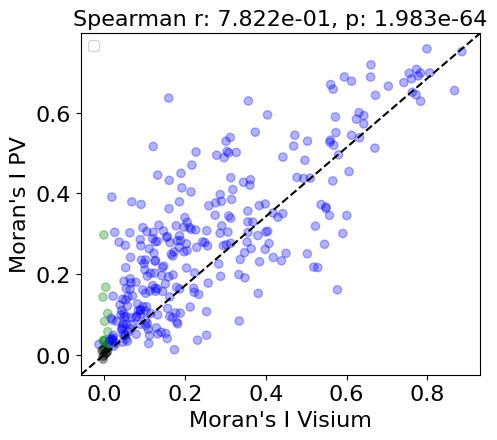

In [107]:
def plot_moransi_comparison(morans_table_fr, morans_table_pv, name):
    morans_table_fr["data"] = "fullres"
    morans_table_pv["data"] = "pseudovisium"
    #shared genes
    shared_genes = np.intersect1d(morans_table_fr.index, morans_table_pv.index)
    morans_table_pv["gene"] = morans_table_pv.index
    morans_table_fr["gene"] = morans_table_fr.index

    # For both dfs, add a column called sig, which is True if pval_norm_fdr_bh is less than 0.05
    morans_table_fr["sig"] = morans_table_fr["pval_sim_fdr_bh"] < 0.05
    morans_table_pv["sig"] = morans_table_pv["pval_sim_fdr_bh"] < 0.05

    #plot df with columns: gene, moranI_fr, moranI_pv, color based on sig
    plot_df = pd.DataFrame()
    #iterate through unique genes in both datasets
    all_genes = np.unique(np.concatenate([morans_table_fr["gene"], morans_table_pv["gene"]]))
    for gene in shared_genes:
        #get the moranI values for the gene in both datasets
        moranI_fr = morans_table_fr[morans_table_fr["gene"] == gene]["I"].values
        moranI_pv = morans_table_pv[morans_table_pv["gene"] == gene]["I"].values
        #get the sig values for the gene in both datasets
        sig_fr = morans_table_fr[morans_table_fr["gene"] == gene]["sig"].values
        sig_pv = morans_table_pv[morans_table_pv["gene"] == gene]["sig"].values
        #if the gene is in the fullres dataset but not in the pseudovisium dataset, add a row with the gene, moranI_fr, 0, sig_fr, False
        if len(moranI_pv) == 0:
            row = pd.DataFrame({"gene": gene, "moranI_fr": moranI_fr[0], "moranI_pv": 0, "sig_fr": sig_fr[0], "sig_pv": False}, index=[0])
        #if the gene is in the pseudovisium dataset but not in the fullres dataset, add a row with the gene, 0, moranI_pv, False, sig_pv
        elif len(moranI_fr) == 0:
            row = pd.DataFrame({"gene": gene, "moranI_fr": 0, "moranI_pv": moranI_pv[0], "sig_fr": False, "sig_pv": sig_pv[0]}, index=[0])
        #if the gene is in both datasets, add a row with the gene, moranI_fr, moranI_pv, sig_fr, sig_pv
        else:
            row = pd.DataFrame({"gene": gene, "moranI_fr": moranI_fr[0], "moranI_pv": moranI_pv[0], "sig_fr": sig_fr[0], "sig_pv": sig_pv[0]}, index=[0])
        #add the row to the plot_df
        plot_df = pd.concat([plot_df, row])

    #blue if both, red if only fullres, green if only pseudovisium
    plot_df["color"]=["blue" if (sig_fr and sig_pv) else "red" if sig_fr else "green" if sig_pv else "black" for sig_fr, sig_pv in zip(plot_df["sig_fr"], plot_df["sig_pv"])]
    plt.figure(figsize=(5, 5))
    #scatter plot of moranI_fr vs moranI_pv, color based on sig
    plt.scatter(plot_df["moranI_fr"], plot_df["moranI_pv"], c=plot_df["color"], alpha=0.3)
    plt.xlabel("Moran's I Visium",fontsize=16)
    plt.ylabel("Moran's I PV",fontsize=16)

    #add diagonal line
    plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls="--", c="black")
    #make plot square
    plt.gca().set_aspect("equal")
    #add as title the sparman correlation and p value to 3 decimals in scientific notation
    r,p = scipy.stats.spearmanr(plot_df["moranI_fr"], plot_df["moranI_pv"])
    plt.title(f"Spearman r: {r:.3e}, p: {p:.3e}",fontsize=16)

     # Decrease figure size

    plt.tick_params(axis='both', which='major', labelsize=16)  # Increase tick size

    plt.legend()
    plt.tight_layout()
    plt.savefig("moransi_"+name+".png", dpi=300)

    # Save the plot as SVG
    plt.savefig("moransi_"+name+".svg")
    plt.show()
    return r,p,plot_df

moransi_corr_r,moransi_corr_p,plot_df = plot_moransi_comparison(morans_table_fr, morans_table_pv,"normal")

Overally we saw a decent correlation in spatially variable genes. Now I will plot one of the genes with the highest values.

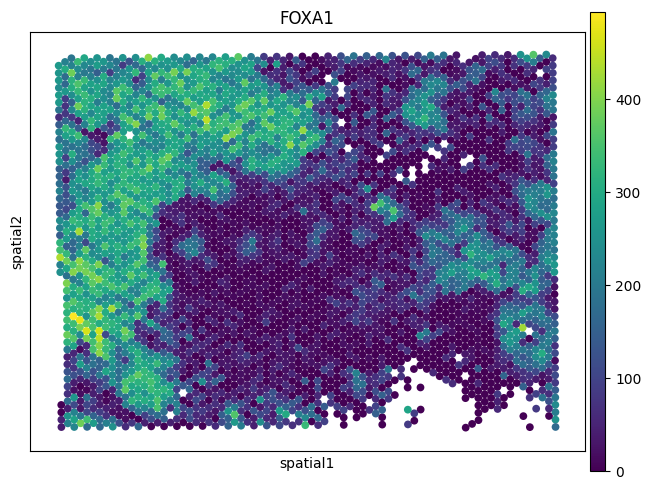

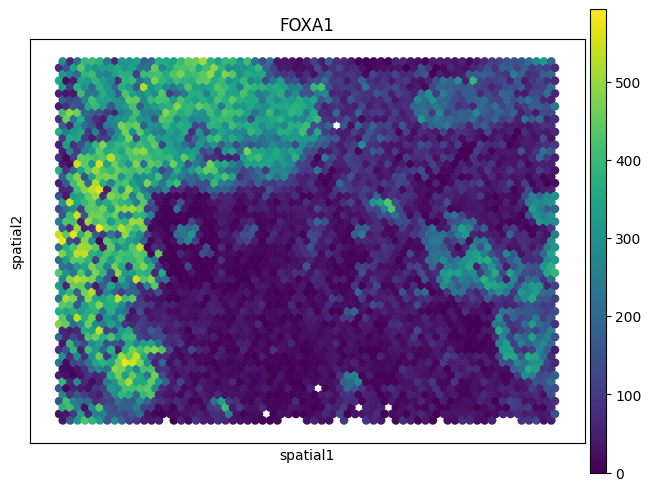

In [108]:

sq.pl.spatial_scatter(pseudovisium, color="FOXA1", cmap="viridis", img=False, size=1.5)
sq.pl.spatial_scatter(visium, color="FOXA1", cmap="viridis", img=False, size=1.8)


We will now perform further processing, PCA and clustering on both datasets to evaluate the similarities in cell populations.

In [109]:
def process_to_leiden(adata_fullres , adata_pseudov):
    print("Processing fullres data")
    start_time_fr = time.time()
    #save raw
    adata_fullres.raw=adata_fullres.copy()
    sc.pp.log1p(adata_fullres )
    sc.pp.scale(adata_fullres )
    print("Starting PCA")
    sc.pp.pca(adata_fullres)
    sc.pp.neighbors(adata_fullres , n_neighbors=20,n_pcs=20)
    nn_graph_genes = adata_fullres.obsp["connectivities"]
    sq.gr.spatial_neighbors(adata_fullres ,radius=250, coord_type="generic", delaunay=True)
    nn_graph_space = adata_fullres .obsp["spatial_connectivities"]
    alpha = 0.25
    joint_graph = (1 - alpha) * nn_graph_genes + alpha * nn_graph_space

    print("Starting leiden clustering")
    sc.tl.leiden(adata_fullres, adjacency=joint_graph, resolution=0.8, key_added="leiden")
    n_clusters = adata_fullres.obs["leiden"].nunique()
    end_time_fr = time.time()
    time_fr = end_time_fr - start_time_fr

    print("Processing pseudovisium data")
    start_time_pv = time.time()

    #save raw
    adata_pseudov.raw=adata_pseudov.copy()
    sc.pp.log1p(adata_pseudov)
    sc.pp.scale(adata_pseudov)
    print("Starting PCA")
    sc.pp.pca(adata_pseudov)
    sc.pp.neighbors(adata_pseudov,n_neighbors=20,n_pcs=20)
    nn_graph_genes = adata_pseudov.obsp["connectivities"]

    sq.gr.spatial_neighbors(adata_pseudov, radius=250, coord_type="generic", delaunay=True)
    nn_graph_space = adata_pseudov.obsp["spatial_connectivities"]
    alpha = 0.25
    joint_graph = (1 - alpha) * nn_graph_genes + alpha * nn_graph_space
    sc.tl.leiden(adata_pseudov, adjacency=joint_graph, key_added="leiden")
    end_time_pv = time.time()
    time_pv = end_time_pv - start_time_pv


    n_clust_pv = 0
    resolution = 0.01
    best_resolution = 0.5
    n_clust_diff_best = np.abs(n_clust_pv-n_clusters)
    #it should be equal +-1
    while resolution < 3:
      print("Trying resolution: ",resolution)
      sc.tl.leiden(adata_pseudov, resolution=resolution, key_added="leiden")
      n_clust_pv = adata_pseudov .obs["leiden"].nunique()
      print("Difference in number of clusters: ",np.abs(n_clust_pv-n_clusters))

      n_clust_diff = np.abs(n_clust_pv-n_clusters)
      if n_clust_diff < n_clust_diff_best:
        n_clust_diff_best = n_clust_diff
        best_resolution = resolution
      resolution = resolution*1.2

    print("best resolution: ", best_resolution)
    sc.tl.leiden(adata_pseudov, resolution=best_resolution, key_added="leiden")
    n_clust_pv = adata_pseudov.obs["leiden"].nunique()
    print("Difference in number of clusters: ",np.abs(n_clust_pv-n_clusters))

    return adata_fullres , adata_pseudov, time_fr, time_pv

visium, pseudovisium, process_to_leiden_time_fr, process_to_leiden_time_pv = process_to_leiden(visium, pseudovisium)
print(f"Fullres processing time: {process_to_leiden_time_fr:.2f}")
print(f"Pseudovisium processing time: {process_to_leiden_time_pv:.2f}")

Processing fullres data
Starting PCA
Starting leiden clustering
Processing pseudovisium data
Starting PCA
Trying resolution:  0.01
Difference in number of clusters:  8
Trying resolution:  0.012
Difference in number of clusters:  8
Trying resolution:  0.0144
Difference in number of clusters:  8
Trying resolution:  0.01728
Difference in number of clusters:  8
Trying resolution:  0.020736
Difference in number of clusters:  8
Trying resolution:  0.0248832
Difference in number of clusters:  8
Trying resolution:  0.02985984
Difference in number of clusters:  8
Trying resolution:  0.035831808
Difference in number of clusters:  7
Trying resolution:  0.0429981696
Difference in number of clusters:  7
Trying resolution:  0.05159780351999999
Difference in number of clusters:  7
Trying resolution:  0.06191736422399999
Difference in number of clusters:  7
Trying resolution:  0.07430083706879999
Difference in number of clusters:  6
Trying resolution:  0.08916100448255998
Difference in number of clust

We will then plot these clusters below

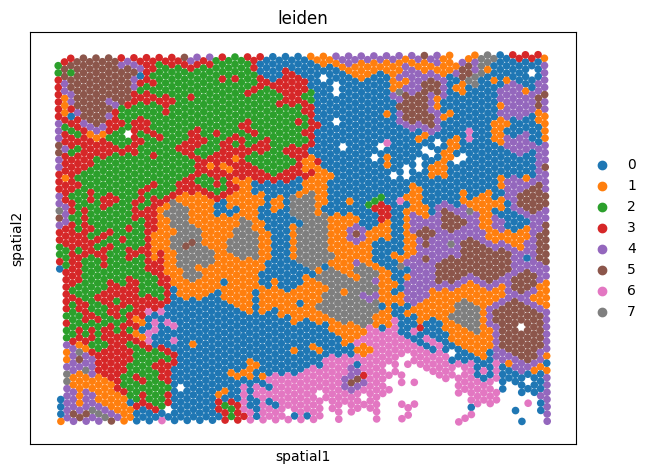

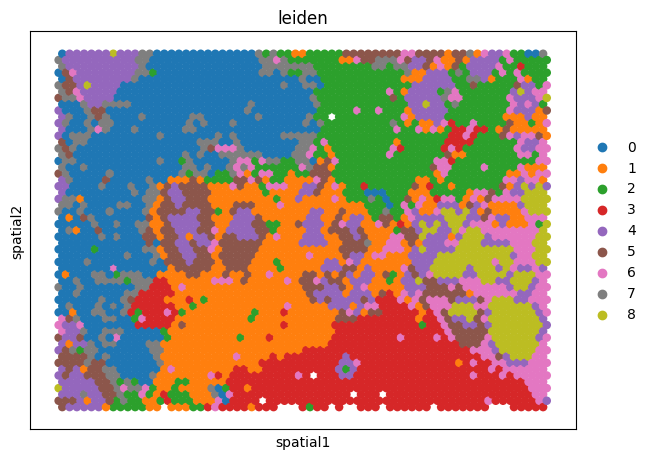

In [110]:
sq.pl.spatial_scatter(pseudovisium, color="leiden", cmap="viridis", img=False,size=1.5)
sq.pl.spatial_scatter(visium, color="leiden", cmap="viridis", img=False,size=1.8)


That the colors differ between the two plots can be quite annoying, so we will change up the colors to be more similar.

In [111]:
mapping = {
    "0": "2",
    "2": "0",
    "3": "6",
    "6": "4",
    "4": "7",
    "7": "3",
    "8": "5",
    "5":"8"

}

# Use the replace() function to modify the 'leiden' column based on the mapping
visium.obs['leiden'] = visium.obs['leiden'].replace(mapping)

Plotting again

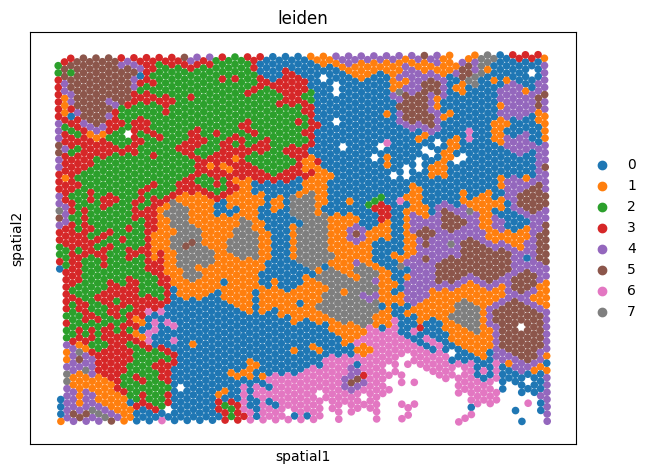

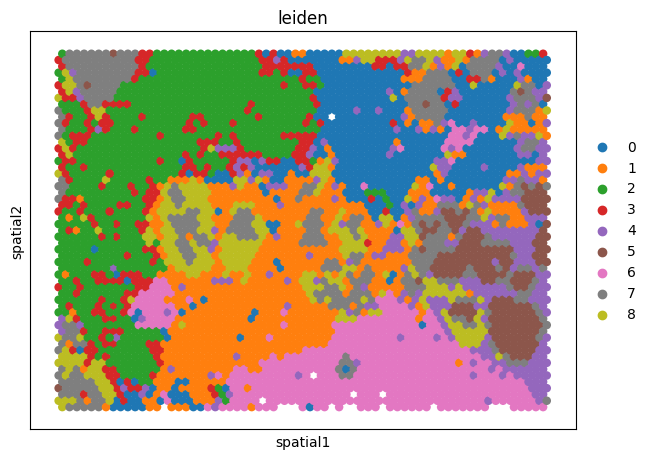

In [112]:
sq.pl.spatial_scatter(pseudovisium, color="leiden", cmap="viridis", img=False,size=1.5)
sq.pl.spatial_scatter(visium, color="leiden", cmap="viridis", img=False,size=1.8)


Next, we perform gene set enrichment analysis in space. For this we will use the convenient spatialAUC wrapper, which wraps gseapy and squidpy. The function was just copied from the Fig2B/Fig5 notebook. For more information check the github page for spatialauc: https://github.com/BKover99/spatialAUC

In [ ]:
from spatialAUC.spatialAUC import get_df_from_gmt, get_auc
import time
def process_data_gsea(adata_fullres, adata_pv, species):
    genes = list(set(adata_fullres.var_names) & set(adata_pv.var_names))

    if species == "Human":
        gene_sets = ['c5.all', 'c2.all']
        version = '2023.1.Hs'
    elif species == "Mouse":
        gene_sets = ['m5.all', 'm2.all']
        version = '2023.1.Mm'
    else:
        raise ValueError("Invalid species. Supported options are 'Human' and 'Mouse'.")

    df = get_df_from_gmt(gene_sets, version, genes,min_gene_ratio=0.2, min_gene_count=4)

    start_time_fullres = time.time()
    new_adata_fullres = get_auc(adata_fullres, df, axis=0)
    end_time_fullres = time.time()
    gsea1_time_fullres = end_time_fullres - start_time_fullres

    start_time_pv = time.time()
    new_adata_pv = get_auc(adata_pv, df, axis=0)
    end_time_pv = time.time()
    gsea1_time_pv = end_time_pv - start_time_pv

    return new_adata_fullres, new_adata_pv, gsea1_time_fullres, gsea1_time_pv

We can now print the gene sets.

In [ ]:
new_adata_fullres, new_adata_pv, gsea1_time_fullres, gsea1_time_pv = process_data_gsea(visium, pseudovisium, "Human")
new_adata_fullres.var

/usr/local/lib/python3.10/dist-packages/gseapy/msigdb.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  d = pd.read_html(resp.text)[0]
/usr/local/lib/python3.10/dist-packages/gseapy/msigdb.py:72: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  d = pd.read_html(resp.text)[0]


gene_set
gene_set                                                                                             
GOBP_REGULATION_OF_TOLERANCE_INDUCTION                         GOBP_REGULATION_OF_TOLERANCE_INDUCTION
GOBP_NEGATIVE_REGULATION_OF_T_CELL_MEDIATED_IMM...  GOBP_NEGATIVE_REGULATION_OF_T_CELL_MEDIATED_IM...
GOBP_CYTOLYSIS                                                                         GOBP_CYTOLYSIS
GOBP_NEGATIVE_REGULATION_OF_CELL_KILLING                     GOBP_NEGATIVE_REGULATION_OF_CELL_KILLING
GOBP_POSITIVE_REGULATION_OF_INTERLEUKIN_2_PRODU...  GOBP_POSITIVE_REGULATION_OF_INTERLEUKIN_2_PROD...
GOBP_POSITIVE_REGULATION_OF_INTERLEUKIN_4_PRODU...  GOBP_POSITIVE_REGULATION_OF_INTERLEUKIN_4_PROD...
GOBP_POSITIVE_REGULATION_OF_CELL_ADHESION_MEDIA...  GOBP_POSITIVE_REGULATION_OF_CELL_ADHESION_MEDI...
GOBP_THYMIC_T_CELL_SELECTION                                             GOBP_THYMIC_T_CELL_SELECTION
GOBP_GAMMA_DELTA_T_CELL_ACTIVATION                                 GOBP_GAMMA_DELTA_T_CELL_ACTIVATION
GOBP_RENAL_ABSORPTION                                                           GOBP_RENAL_ABSORPTION
GOBP_CELLULAR_RESPONSE_TO_ESTROGEN_STIMULUS               GOBP_CELLULAR_RESPONSE_TO_ESTROGEN_STIMULUS
GOBP_POSITIVE_REGULATION_OF_MONOCYTE_CHEMOTAXIS       GOBP_POSITIVE_REGULATION_OF_MONOCYTE_CHEMOTAXIS
GOCC_ALPHA_BETA_T_CELL_RECEPTOR_COMPLEX                       GOCC_ALPHA_BETA_T_CELL_RECEPTOR_COMPLEX
GOMF_IMMUNOGLOBULIN_BINDING                                               GOMF_IMMUNOGLOBULIN_BINDING
KEGG_PRIMARY_IMMUNODEFICIENCY                                           KEGG_PRIMARY_IMMUNODEFICIENCY
REACTOME_PD_1_SIGNALING                                                       REACTOME_PD_1_SIGNALING
REACTOME_TFAP2_AP_2_FAMILY_REGULATES_TRANSCRIPT...  REACTOME_TFAP2_AP_2_FAMILY_REGULATES_TRANSCRIP...

To compare the similarities between the Moran's I values (proxy for spatial enrichment) we can take advantage of the previously defined Moran's I plotting function.

/usr/local/lib/python3.10/dist-packages/gseapy/msigdb.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  d = pd.read_html(resp.text)[0]
/usr/local/lib/python3.10/dist-packages/gseapy/msigdb.py:72: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  d = pd.read_html(resp.text)[0]


  0%|          | 0/100 [00:00<?, ?/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/100 [00:00<?, ?/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Fullres calculation - Time: 4.33
Pseudovisium calculation - Time: 1.06


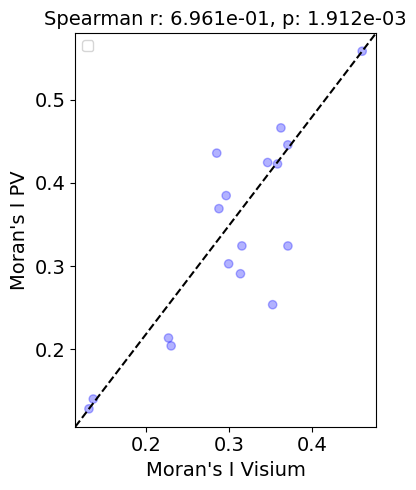

(0.6960784313725491,
 0.0019116293549668434,
                                                 gene  moranI_fr  moranI_pv  \
 0        GOBP_CELLULAR_RESPONSE_TO_ESTROGEN_STIMULUS   0.226970   0.213447   
 0                                     GOBP_CYTOLYSIS   0.346252   0.424648   
 0                 GOBP_GAMMA_DELTA_T_CELL_ACTIVATION   0.358151   0.422934   
 0           GOBP_NEGATIVE_REGULATION_OF_CELL_KILLING   0.299344   0.302714   
 0  GOBP_NEGATIVE_REGULATION_OF_T_CELL_MEDIATED_IM...   0.287658   0.369107   
 0  GOBP_POSITIVE_REGULATION_OF_CELL_ADHESION_MEDI...   0.131209   0.128185   
 0  GOBP_POSITIVE_REGULATION_OF_INTERLEUKIN_2_PROD...   0.370684   0.324215   
 0  GOBP_POSITIVE_REGULATION_OF_INTERLEUKIN_4_PROD...   0.136422   0.139997   
 0    GOBP_POSITIVE_REGULATION_OF_MONOCYTE_CHEMOTAXIS   0.352295   0.253538   
 0             GOBP_REGULATION_OF_TOLERANCE_INDUCTION   0.230142   0.203956   
 0                              GOBP_RENAL_ABSORPTION   0.315278   0.324277   
 0     

In [ ]:
new_adata_fullres, new_adata_pv, gsea1_time_fullres, gsea1_time_pv = process_data_gsea(visium, pseudovisium, "Human")
new_adata_fullres, new_adata_pv, morans_table_fr_gsea, morans_table_pv_gsea, compare_morans_time_fr, compare_morans_time_pv = compare_morans(new_adata_fullres, new_adata_pv)
plot_moransi_comparison(morans_table_fr_gsea, morans_table_pv_gsea,"gsea")

We can now plot the gene set enrichment values in space.

In [ ]:
new_adata_pv.obsm["spatial"] = pseudovisium.obsm["spatial"]
new_adata_fullres.obsm["spatial"] = visium.obsm["spatial"]

new_adata_pv.uns["spatial"] = pseudovisium.uns["spatial"]
new_adata_fullres.uns["spatial"] = visium.uns["spatial"]

sc.pp.log1p(new_adata_pv)
sc.pp.log1p(new_adata_fullres)

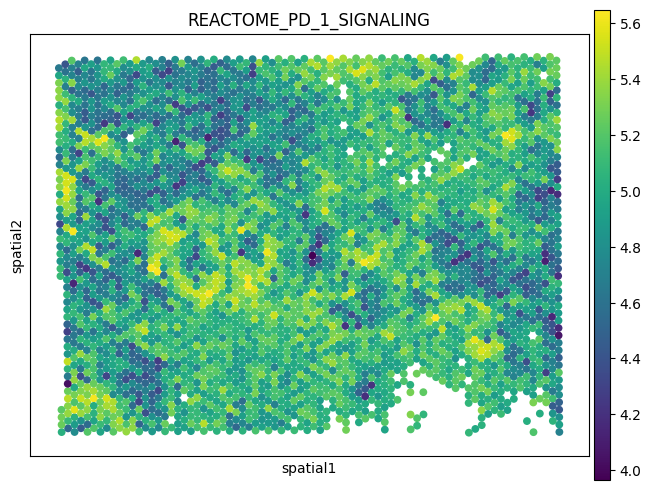

In [ ]:
sq.pl.spatial_scatter(new_adata_pv, color="REACTOME_PD_1_SIGNALING", cmap="viridis", img=False,size=1.5)



Now we will assess the concordance between Pseudovisium and Visium in terms of pairwise gene-gene correlations and marker-marker coexpression frequencies. These are the same functions as used in the other notebooks of the paper.

In [ ]:
def find_freq_above_75pct_both_genes(adata, gene1, gene2):
    #find the cells where both genes are expressed above the median
    both_genes_expressed = adata[(adata[:, gene1].X > np.quantile(adata[:, gene1].X,0.75)) & (adata[:, gene2].X > np.quantile(adata[:, gene2].X,0.75))]
    #return the frequency of such cells
    return len(both_genes_expressed) / len(adata)

def plot_and_fit_model_to_marker_coexp(adata_fullres,adata_pv,morans_table_fr):
    #compare gene expression pairs between pv and fullres data
    #first all_genes is defined by the intersection in the two objects
    all_genes= np.intersect1d(adata_fullres.var_names,adata_pv.var_names)

    all_genes = np.intersect1d(all_genes,morans_table_fr[:50].index.values)
    #get all unique pairs
    all_pairs=[]
    for i in range(len(all_genes)):
        for j in range(i+1,len(all_genes)):
            all_pairs.append((all_genes[i],all_genes[j]))
    #define a function which finds the all cells expressing both genes above its median and takes the frequency of such cells



    #get values for all_pairs in both adata_fullres and adata_pv and then create a scatterplot of values
    adata_fullres_paired_freqs = [find_freq_above_75pct_both_genes(adata_fullres, gene1, gene2) for gene1, gene2 in all_pairs]
    adata_pv_paired_freqs = [find_freq_above_75pct_both_genes(adata_pv, gene1, gene2) for gene1, gene2 in all_pairs]

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.scatter(adata_fullres_paired_freqs, adata_pv_paired_freqs, alpha=0.05)

    # also show diagonal dotted black line
    ax.plot(np.array([0, 0.25]), np.array([0, 0.25]), color="black", linestyle="--")

    plt.tick_params(axis='both', which='major', labelsize=12)  # Increase tick size

    plt.legend()
    plt.tight_layout()


    # Save the plot as SVG


    ax.set_xlabel("Visium freq. overlapping markers",fontsize=12)
    ax.set_ylabel("PV freq. overlapping markers",fontsize=12)
    plt.savefig("marker_coexp.svg")
    plt.savefig("marker_coexp.png", dpi=300)

    plt.show()



In [ ]:
#now repeat a similar approach but instead of getting the frequencies of being above the median calculate spearman corr
def find_spearman_both_genes(adata, gene1, gene2):
    spearman_r,p = stats.spearmanr(adata[:, gene1].X, adata[:, gene2].X)
    return spearman_r

def plot_and_fit_model_to_marker_corr(adata_fullres,adata_pv,morans_table_fr):
    #compare gene expression pairs between pv and fullres data
    #first all_genes is defined by the intersection in the two objects
    all_genes= np.intersect1d(adata_fullres.var_names,adata_pv.var_names)
    #only retain those in morans_table_fr[:100].index.values
    all_genes = np.intersect1d(all_genes,morans_table_fr[:50].index.values)
    #get all unique pairs
    all_pairs=[]
    for i in range(len(all_genes)):
        for j in range(i+1,len(all_genes)):
            all_pairs.append((all_genes[i],all_genes[j]))
    #define a function which finds the all cells expressing both genes above its median and takes the frequency of such cells



    #get values for all_pairs in both adata_fullres and adata_pv and then create a scatterplot of values
    adata_fullres_r = [find_spearman_both_genes(adata_fullres, gene1, gene2) for gene1, gene2 in all_pairs]
    adata_pv_r = [find_spearman_both_genes(adata_pv, gene1, gene2) for gene1, gene2 in all_pairs]

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.scatter(adata_fullres_r, adata_pv_r, alpha=0.05)

    # calculate slope of linear model
    slope, intercept = np.polyfit(adata_fullres_r, adata_pv_r, 1)
    ax.plot(np.array([-1, 1]), slope * np.array([-1, 1]) + intercept, color="red")

    # also show diagonal dotted black line
    ax.plot(np.array([-1, 1]), np.array([-1, 1]), color="black", linestyle="--")

    # Decrease figure size

    plt.tick_params(axis='both', which='major', labelsize=12)  # Increase tick size

    plt.tight_layout()
    ax.set_xlabel("Visium marker corr coef.",fontsize=12)
    ax.set_ylabel("PV marker corr coef.",fontsize=12)


    plt.savefig("marker_corr.png", dpi=300)

    # Save the plot as SVG
    plt.savefig("marker_corr.svg")


    plt.show()

We can plot and see how there is very high similarity in the frequency of coexpression of markers between the two datasets.

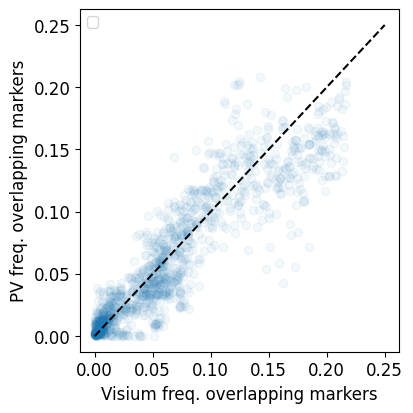

In [ ]:
plot_and_fit_model_to_marker_coexp(visium,pseudovisium,morans_table_fr)

Similarly, there is a high concordance in gene-gene correlation values.

In [ ]:
import scipy.stats as stats

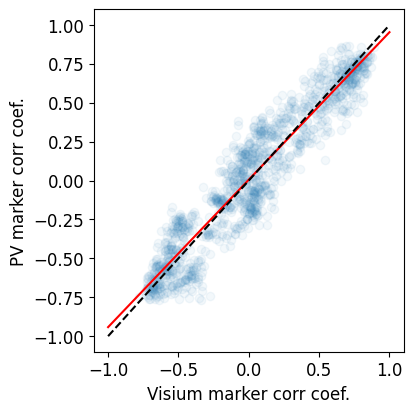

In [ ]:
plot_and_fit_model_to_marker_corr(visium,pseudovisium,morans_table_fr)

# Looking at CosMx data

Before running the Pseudovisium generate function, we need to create a cell column in the CosMx data. This column might be missing because the dataset was acquired using an older CosMx pipeline. We simply obtain unique cell IDs by concatenating the cellID (unique within FOV) and FOV ID. Then we can run Pseudovisium_generate for hexagonal binning.

In [ ]:
import pandas as pd
csv_file="/content/SP5_Run5452_S2/Run5452_S2_tx_file.csv"
output_path="/content/"
hexagon_size=50

df = pd.read_csv(csv_file)

df['cell'] = df['fov'].astype(str) + '_' + df['cell_ID'].astype(str)

df.to_csv(csv_file, index=False)

pseudovisium_path = generate_pv(csv_file=csv_file,
                                hexagon_size=hexagon_size,
                                output_path=output_path,
                                batch_size=5000000,
                                technology="Nanostring",
                                spot_diameter=55.0,
                                max_workers=10,
                                coord_to_um_conversion=0.12028,
                                project_name='cosmx_pv')

You are using version:  ['Pseudovisium==0.0.42']
Date:  2024-06-16
Technology is Nanostring. Going forward with default column names.
Quality filter is set to False
Quality counting per hexagon is set to False
Quality counting per probe is set to False
Visium-like spots are going to be used rather than hexagonal tesselation!!!
Created temporary directory /tmp/tmp_hexais1n6ix1
Now creating batches
Created batch 1
Created batch 2
Finished preprocessing. Total batches created: 2
Processing batches using 8 processes


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing batches: 100%|██████████| 2/2 [00:55<00:00, 27.97s/batch]


Visium-like array structure is being built rather than hexagonal tesselation!!!
Creating pseudovisium folder in output path:/content//pseudovisium/cosmx_pv
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.
No quality information provided. Skipping quality information files.
No quality information provided. Skipping quality information files.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 2757902.0
Number of unique hexagons: 784
Creating matrix.mtx.gz file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 146.2728943824768 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.


Loading in the visium data. Here again the spatial coordinates have to be normalised. This worked nicely with 55um, which should be the official Visium spot diameter anyway.

In [ ]:
#load visium
visium = sq.read.visium("/content/GSE211956_RAW")
spot_diameter_fullres = visium.uns["spatial"]['c']['scalefactors']['spot_diameter_fullres']
spot_real_diameter_um = 55
um_per_pixel = spot_real_diameter_um / spot_diameter_fullres
visium.uns["spatial"]['c']['scalefactors']['spot_diameter_fullres'] = spot_real_diameter_um
#in visium.obsm['spatial'] multiply by um_per_pixel to get the real coordinates
visium.obsm['spatial'] = visium.obsm['spatial'] * um_per_pixel #converting to um

Loading in the Pseudovisium data

In [ ]:
# load in /Users/k23030440/Library/CloudStorage/OneDrive-King'sCollegeLondon/colab/pseudovisium/xenium_breast_rep1
pseudovisium = sq.read.visium("/content/pseudovisium/cosmx_pv",library_id="CosMx")

Visualising the number of cells contributing to each spot.

19.0
20.2359693877551


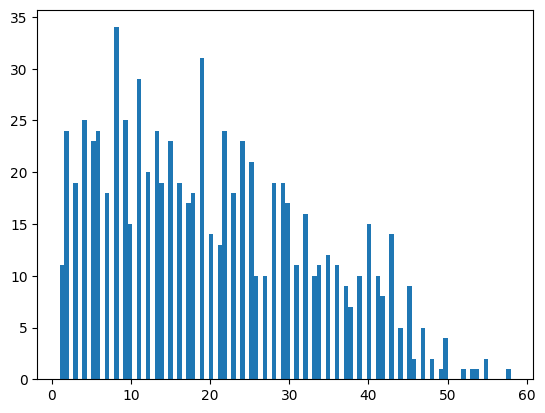

In [ ]:
#counting the median number of cells contributing to each spot
pv_cell_hex = pd.read_csv('/content/pseudovisium/cosmx_pv/spatial/pv_cell_hex.csv',header=None)
pv_cell_hex.columns = ["cell_id","Hex_id","count"]
plt.hist(pv_cell_hex.groupby("Hex_id").count()["cell_id"].values,bins=100)
print(np.median(pv_cell_hex.groupby("Hex_id").count()["cell_id"].values))
print(np.mean(pv_cell_hex.groupby("Hex_id").count()["cell_id"].values))


### From this point on the functions and plots are exactly the same as above for the Xenium dataset. Therefore refer to the above codeblocks when looking for an explanation.

In [ ]:
#Keep only the same genes
shared_genes=np.intersect1d(visium.var.index,pseudovisium.var.index)
pseudovisium_indices = np.where(np.isin(pseudovisium.var.index, shared_genes))[0]
visium_indices = np.where(np.isin(visium.var.index, shared_genes))[0]

pseudovisium = pseudovisium[:, pseudovisium_indices]
visium = visium[:, visium_indices]

In [ ]:
sc.pp.calculate_qc_metrics(visium, percent_top=(50, 100, 200), inplace=True)
sc.pp.calculate_qc_metrics(pseudovisium, percent_top=(50, 100, 200), inplace=True)


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_qc.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_qc.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics


<Axes: title={'center': 'PV - Unique transcripts per cell'}, xlabel='n_genes_by_counts', ylabel='Count'>

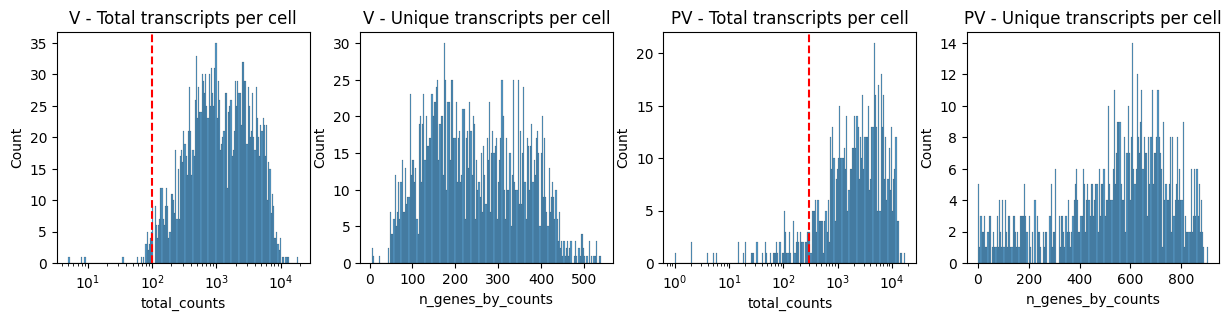

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(15, 3))
import seaborn as sns

axs[0].set_title("V - Total transcripts per cell")
sns.histplot(
    visium.obs["total_counts"],
    kde=False,
    ax=axs[0],bins=200,log_scale=True
)
axs[0].axvline(100, color="red", linestyle="--")


axs[1].set_title("V - Unique transcripts per cell")
sns.histplot(
    visium.obs["n_genes_by_counts"],
    kde=False,
    ax=axs[1],bins=200
)
axs[2].set_title("PV - Total transcripts per cell")
sns.histplot(
    pseudovisium.obs["total_counts"],
    kde=False,
    ax=axs[2],bins=200,log_scale=True
)
axs[2].axvline(300, color="red", linestyle="--")

axs[3].set_title("PV - Unique transcripts per cell")
sns.histplot(
    pseudovisium.obs["n_genes_by_counts"],
    kde=False,
    ax=axs[3],bins=200
)





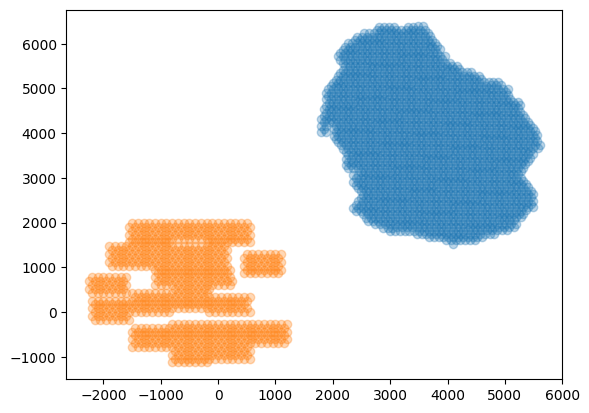

In [ ]:
plt.scatter(visium.obsm["spatial"][:,0],visium.obsm["spatial"][:,1],alpha=0.3)
plt.scatter(pseudovisium.obsm["spatial"][:,0],pseudovisium.obsm["spatial"][:,1],alpha=0.3)

In [ ]:
coords = visium.obsm["spatial"]
#rotate these by left by 90 degrees
coords = np.array([coords[:,0],-coords[:,1]]).T
#add the minimum value's absolute value to all entries in coords[:,1]
coords[:,1]=coords[:,1]+abs(min(coords[:,1]))
#and now upside down
visium.obsm["spatial"]= coords


#visium remove entries where y<500
#visium = visium[visium.obsm["spatial"][:,1]<3000,]

#remove right max- 500
#pseudovisium = pseudovisium[pseudovisium.obsm["spatial"][:,0]<7000,]
#pseudovisium = pseudovisium[pseudovisium.obsm["spatial"][:,0]>200,]
#pseudovisium = pseudovisium[pseudovisium.obsm["spatial"][:,1]>600,]
#pseudovisium = pseudovisium[pseudovisium.obsm["spatial"][:,1]<5500,]




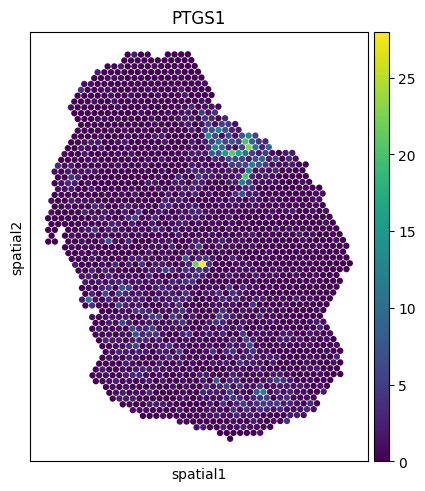

In [ ]:
visium.obs["sum"]=visium.X.sum(axis=1)
pseudovisium.obs["sum"]=pseudovisium.X.sum(axis=1)
sq.pl.spatial_scatter(visium, color="PTGS1", cmap="viridis", img=False,size=1.45)
plt.savefig("ptgs1_v.svg")
plt.savefig("ptgs1_v.png")

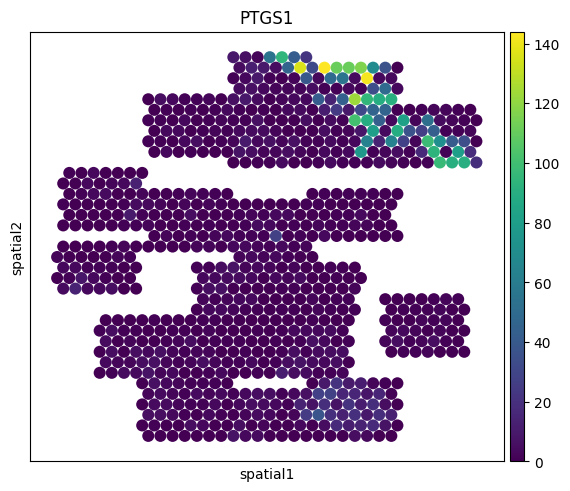

In [ ]:
sq.pl.spatial_scatter(pseudovisium, color="PTGS1", cmap="viridis", img=False,size=1.8)
plt.savefig("ptgs1_pv.svg")
plt.savefig("ptgs1_pv.png")

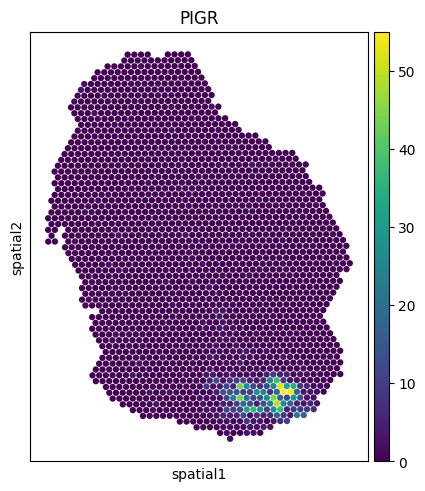

In [ ]:

sq.pl.spatial_scatter(visium, color="PIGR", cmap="viridis", img=False,size=1.45)
plt.savefig("pigr_v.svg")
plt.savefig("pigr_v.png")

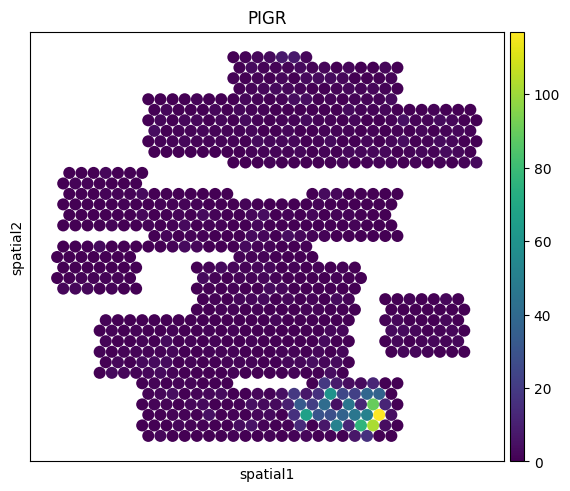

In [ ]:
sq.pl.spatial_scatter(pseudovisium, color="PIGR", cmap="viridis", img=False,size=1.8)
plt.savefig("pigr_pv.svg")
plt.savefig("pigr_pv.png")

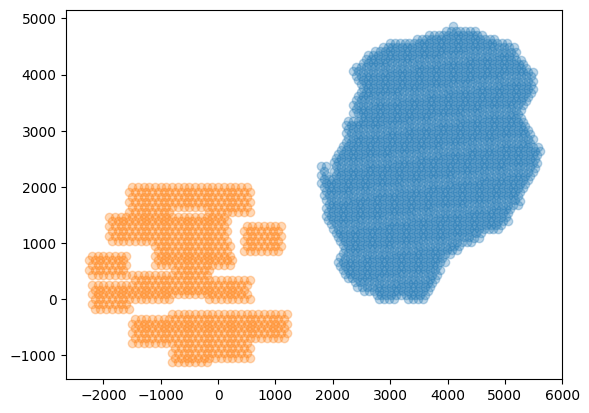

In [ ]:
plt.scatter(visium.obsm["spatial"][:,0],visium.obsm["spatial"][:,1],alpha=0.3)
plt.scatter(pseudovisium.obsm["spatial"][:,0],pseudovisium.obsm["spatial"][:,1],alpha=0.3)

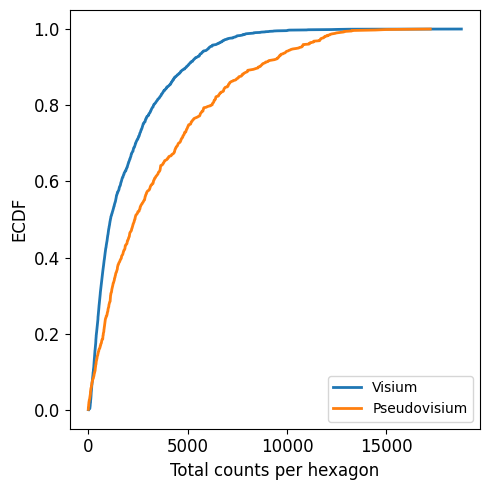

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined visium and pseudovisium DataFrames

x_v = np.sort(visium.obs["sum"])
y_v = np.arange(1, len(x_v)+1) / len(x_v)
x_pv = np.sort(pseudovisium.obs["sum"])
y_pv = np.arange(1, len(x_pv)+1) / len(x_pv)

plt.figure(figsize=(5, 5))  # Decrease figure size
plt.plot(x_v, y_v, label="Visium", lw=2)
plt.plot(x_pv, y_pv, label="Pseudovisium", lw=2)

plt.xlabel("Total counts per hexagon",fontsize=12)  # Add x-axis label
plt.ylabel("ECDF",fontsize=12)  # Add y-axis label

plt.tick_params(axis='both', which='major', labelsize=12)  # Increase tick size


plt.legend()
plt.tight_layout()
plt.savefig("cumulative_proportion.png", dpi=300)

# Save the plot as SVG
plt.savefig("cumulative_proportion.svg")
plt.show()

In [ ]:
sc.pp.filter_cells(pseudovisium, min_counts=300)
sc.pp.filter_genes(pseudovisium, min_cells=30)
sc.pp.filter_cells(visium, min_counts=100)
sc.pp.filter_genes(visium, min_cells=30)

In [ ]:
n_spots_pv = pseudovisium.shape[0]
n_spots_v = visium.shape[0]

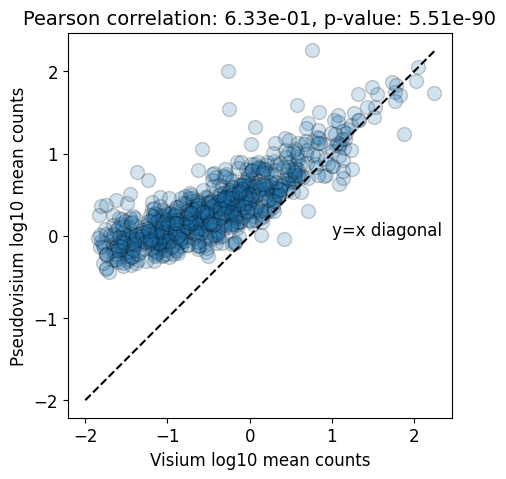

In [ ]:
means_v = []
means_pv = []
shared_genes = np.intersect1d(visium.var.index,pseudovisium.var.index)
for gene in shared_genes:
    means_v.append(visium[:, gene].X.sum()/n_spots_v)
    means_pv.append(pseudovisium[:, gene].X.sum()/n_spots_pv)

fig, ax = plt.subplots(figsize=(5, 5))

plt.scatter(np.log10(means_v), np.log10(means_pv),alpha=0.2,edgecolors="black", s=100)
plt.xlabel("Visium log10 mean counts",fontsize=12)
plt.ylabel("Pseudovisium log10 mean counts",fontsize=12)
#add diagonal line
plt.plot([-2, 2.25], [-2, 2.25] , color="black", linestyle="--")
#make plot square
plt.gca().set_aspect('equal', adjustable='box')
pearson_r, pearson_p = scipy.stats.pearsonr(means_v, means_pv)
#print in scientific notation
plt.title(f"Pearson correlation: {pearson_r:.2e}, p-value: {pearson_p:.2e}", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
#with red show diagonal line
plt.text(1, 0, "y=x diagonal", color="black", fontsize=12)
plt.savefig("sum_scatter_cosmx.png")
plt.savefig("sum_scatter_cosmx.svg")

In [ ]:
sc.pp.normalize_total(visium, target_sum=1e4)
sc.pp.normalize_total(pseudovisium, target_sum=1e4)


Text(4, 2.5, 'y=x diagonal')

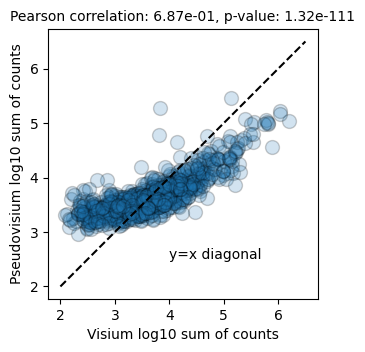

In [ ]:
import scipy.stats
means_v = []
means_pv = []
shared_genes = np.intersect1d(visium.var.index,pseudovisium.var.index)
for gene in shared_genes:
    means_v.append(visium[:, gene].X.sum())
    means_pv.append(pseudovisium[:, gene].X.sum())

fig, ax = plt.subplots(figsize=(3.5, 3.5))

plt.scatter(np.log10(means_v), np.log10(means_pv),alpha=0.2,edgecolors="black", s=100)
plt.xlabel("Visium log10 sum of counts")
plt.ylabel("Pseudovisium log10 sum of counts")
#add diagonal line
plt.plot([2, 6.5], [2, 6.5], color="black", linestyle="--")
#make plot square
plt.gca().set_aspect('equal', adjustable='box')
pearson_r, pearson_p = scipy.stats.pearsonr(means_v, means_pv)
#print in scientific notation
plt.title(f"Pearson correlation: {pearson_r:.2e}, p-value: {pearson_p:.2e}", fontsize=10)
#with red show diagonal line
plt.text(4, 2.5, "y=x diagonal", color="black", fontsize=10)

In [ ]:
import time
def compare_morans(adata_fullres , adata_pseudov):

    # First calculation for fullres
    start_time_fr = time.time()

    sq.gr.spatial_neighbors(adata_fullres , radius=250, coord_type="generic", delaunay=True)
    sq.gr.spatial_autocorr(adata_fullres , mode="moran", n_perms=100, n_jobs=4)
    morans_table_fr = adata_fullres .uns["moranI"]

    end_time_fr = time.time()

    time_fr = end_time_fr - start_time_fr

    # Second calculation for pseudovisium
    start_time_pv = time.time()

    sq.gr.spatial_neighbors(adata_pseudov, radius=250, coord_type="generic", delaunay=True)
    sq.gr.spatial_autocorr(adata_pseudov, mode="moran", n_perms=100, n_jobs=4)
    morans_table_pv = adata_pseudov.uns["moranI"]

    end_time_pv = time.time()

    time_pv = end_time_pv - start_time_pv

    print(f"Fullres calculation - Time: {time_fr:.2f}")
    print(f"Pseudovisium calculation - Time: {time_pv:.2f}")

    return adata_fullres , adata_pseudov, morans_table_fr, morans_table_pv, time_fr, time_pv


pseudovisium, visium, morans_table_fr, morans_table_pv, compare_morans_time_fr, compare_morans_time_pv = compare_morans(visium, pseudovisium)
print(f"Fullres processing time: {compare_morans_time_fr:.2f}")
print(f"Pseudovisium processing time: {compare_morans_time_pv:.2f}")

  0%|          | 0/100 [00:00<?, ?/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


  0%|          | 0/100 [00:00<?, ?/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Fullres calculation - Time: 20.09
Pseudovisium calculation - Time: 6.62
Fullres processing time: 20.09
Pseudovisium processing time: 6.62


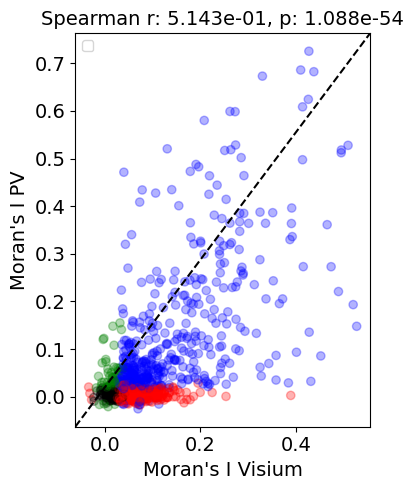

In [ ]:
def plot_moransi_comparison(morans_table_fr, morans_table_pv, name):
    morans_table_fr["data"] = "fullres"
    morans_table_pv["data"] = "pseudovisium"
    #shared genes
    shared_genes = np.intersect1d(morans_table_fr.index, morans_table_pv.index)
    morans_table_pv["gene"] = morans_table_pv.index
    morans_table_fr["gene"] = morans_table_fr.index

    # For both dfs, add a column called sig, which is True if pval_norm_fdr_bh is less than 0.05
    morans_table_fr["sig"] = morans_table_fr["pval_sim_fdr_bh"] < 0.05
    morans_table_pv["sig"] = morans_table_pv["pval_sim_fdr_bh"] < 0.05

    #plot df with columns: gene, moranI_fr, moranI_pv, color based on sig
    plot_df = pd.DataFrame()
    #iterate through unique genes in both datasets
    all_genes = np.unique(np.concatenate([morans_table_fr["gene"], morans_table_pv["gene"]]))
    for gene in shared_genes:
        #get the moranI values for the gene in both datasets
        moranI_fr = morans_table_fr[morans_table_fr["gene"] == gene]["I"].values
        moranI_pv = morans_table_pv[morans_table_pv["gene"] == gene]["I"].values
        #get the sig values for the gene in both datasets
        sig_fr = morans_table_fr[morans_table_fr["gene"] == gene]["sig"].values
        sig_pv = morans_table_pv[morans_table_pv["gene"] == gene]["sig"].values
        #if the gene is in the fullres dataset but not in the pseudovisium dataset, add a row with the gene, moranI_fr, 0, sig_fr, False
        if len(moranI_pv) == 0:
            row = pd.DataFrame({"gene": gene, "moranI_fr": moranI_fr[0], "moranI_pv": 0, "sig_fr": sig_fr[0], "sig_pv": False}, index=[0])
        #if the gene is in the pseudovisium dataset but not in the fullres dataset, add a row with the gene, 0, moranI_pv, False, sig_pv
        elif len(moranI_fr) == 0:
            row = pd.DataFrame({"gene": gene, "moranI_fr": 0, "moranI_pv": moranI_pv[0], "sig_fr": False, "sig_pv": sig_pv[0]}, index=[0])
        #if the gene is in both datasets, add a row with the gene, moranI_fr, moranI_pv, sig_fr, sig_pv
        else:
            row = pd.DataFrame({"gene": gene, "moranI_fr": moranI_fr[0], "moranI_pv": moranI_pv[0], "sig_fr": sig_fr[0], "sig_pv": sig_pv[0]}, index=[0])
        #add the row to the plot_df
        plot_df = pd.concat([plot_df, row])

    #blue if both, red if only fullres, green if only pseudovisium
    plot_df["color"]=["blue" if (sig_fr and sig_pv) else "red" if sig_fr else "green" if sig_pv else "black" for sig_fr, sig_pv in zip(plot_df["sig_fr"], plot_df["sig_pv"])]
    plt.figure(figsize=(5, 5))
    #scatter plot of moranI_fr vs moranI_pv, color based on sig
    plt.scatter(plot_df["moranI_fr"], plot_df["moranI_pv"], c=plot_df["color"], alpha=0.3)
    plt.xlabel("Moran's I Visium",fontsize=14)
    plt.ylabel("Moran's I PV",fontsize=14)

    #add diagonal line
    plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls="--", c="black")
    #make plot square
    plt.gca().set_aspect("equal")
    #add as title the sparman correlation and p value to 3 decimals in scientific notation
    r,p = scipy.stats.spearmanr(plot_df["moranI_fr"], plot_df["moranI_pv"])
    plt.title(f"Spearman r: {r:.3e}, p: {p:.3e}",fontsize=14)

     # Decrease figure size

    plt.tick_params(axis='both', which='major', labelsize=14)  # Increase tick size

    plt.legend()
    plt.tight_layout()
    plt.savefig("moransi_"+name+".png", dpi=300)

    # Save the plot as SVG
    plt.savefig("moransi_"+name+".svg")
    plt.show()
    return r,p,plot_df

moransi_corr_r,moransi_corr_p,plot_df = plot_moransi_comparison(morans_table_fr, morans_table_pv,"normal")

In [ ]:
def find_freq_above_75pct_both_genes(adata, gene1, gene2):
    #find the cells where both genes are expressed above the median
    both_genes_expressed = adata[(adata[:, gene1].X > np.quantile(adata[:, gene1].X,0.75)) & (adata[:, gene2].X > np.quantile(adata[:, gene2].X,0.75))]
    #return the frequency of such cells
    return len(both_genes_expressed) / len(adata)

def plot_and_fit_model_to_marker_coexp(adata_fullres,adata_pv,morans_table_fr):
    #compare gene expression pairs between pv and fullres data
    #first all_genes is defined by the intersection in the two objects
    all_genes= np.intersect1d(adata_fullres.var_names,adata_pv.var_names)

    all_genes = np.intersect1d(all_genes,morans_table_fr[:50].index.values)
    #get all unique pairs
    all_pairs=[]
    for i in range(len(all_genes)):
        for j in range(i+1,len(all_genes)):
            all_pairs.append((all_genes[i],all_genes[j]))
    #define a function which finds the all cells expressing both genes above its median and takes the frequency of such cells



    #get values for all_pairs in both adata_fullres and adata_pv and then create a scatterplot of values
    adata_fullres_paired_freqs = [find_freq_above_75pct_both_genes(adata_fullres, gene1, gene2) for gene1, gene2 in all_pairs]
    adata_pv_paired_freqs = [find_freq_above_75pct_both_genes(adata_pv, gene1, gene2) for gene1, gene2 in all_pairs]

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.scatter(adata_fullres_paired_freqs, adata_pv_paired_freqs, alpha=0.05)

    # also show diagonal dotted black line
    ax.plot(np.array([0, 0.25]), np.array([0, 0.25]), color="black", linestyle="--")

    plt.tick_params(axis='both', which='major', labelsize=12)  # Increase tick size

    plt.legend()
    plt.tight_layout()


    # Save the plot as SVG


    ax.set_xlabel("Visium freq. overlapping markers",fontsize=12)
    ax.set_ylabel("PV freq. overlapping markers",fontsize=12)
    plt.savefig("marker_coexp.svg")
    plt.savefig("marker_coexp.png", dpi=300)

    plt.show()



In [ ]:
#now repeat a similar approach but instead of getting the frequencies of being above the median calculate spearman corr
def find_spearman_both_genes(adata, gene1, gene2):
    spearman_r,p = stats.spearmanr(adata[:, gene1].X, adata[:, gene2].X)
    return spearman_r

def plot_and_fit_model_to_marker_corr(adata_fullres,adata_pv,morans_table_fr):
    #compare gene expression pairs between pv and fullres data
    #first all_genes is defined by the intersection in the two objects
    all_genes= np.intersect1d(adata_fullres.var_names,adata_pv.var_names)
    #only retain those in morans_table_fr[:100].index.values
    all_genes = np.intersect1d(all_genes,morans_table_fr[:50].index.values)
    #get all unique pairs
    all_pairs=[]
    for i in range(len(all_genes)):
        for j in range(i+1,len(all_genes)):
            all_pairs.append((all_genes[i],all_genes[j]))
    #define a function which finds the all cells expressing both genes above its median and takes the frequency of such cells



    #get values for all_pairs in both adata_fullres and adata_pv and then create a scatterplot of values
    adata_fullres_r = [find_spearman_both_genes(adata_fullres, gene1, gene2) for gene1, gene2 in all_pairs]
    adata_pv_r = [find_spearman_both_genes(adata_pv, gene1, gene2) for gene1, gene2 in all_pairs]

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.scatter(adata_fullres_r, adata_pv_r, alpha=0.05)

    # calculate slope of linear model
    slope, intercept = np.polyfit(adata_fullres_r, adata_pv_r, 1)
    ax.plot(np.array([-1, 1]), slope * np.array([-1, 1]) + intercept, color="red")

    # also show diagonal dotted black line
    ax.plot(np.array([-1, 1]), np.array([-1, 1]), color="black", linestyle="--")

    # Decrease figure size

    plt.tick_params(axis='both', which='major', labelsize=12)  # Increase tick size

    plt.tight_layout()
    ax.set_xlabel("Visium marker corr coef.",fontsize=12)
    ax.set_ylabel("PV marker corr coef.",fontsize=12)


    plt.savefig("marker_corr.png", dpi=300)

    # Save the plot as SVG
    plt.savefig("marker_corr.svg")


    plt.show()

In [ ]:
visium.X= visium.X.todense()
pseudovisium.X= pseudovisium.X.todense()

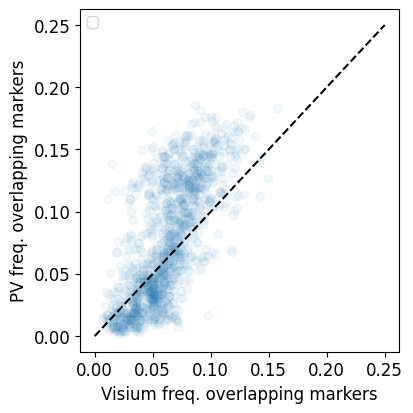

In [ ]:
plot_and_fit_model_to_marker_coexp(visium,pseudovisium,morans_table_fr)

In [ ]:
import scipy.stats as stats

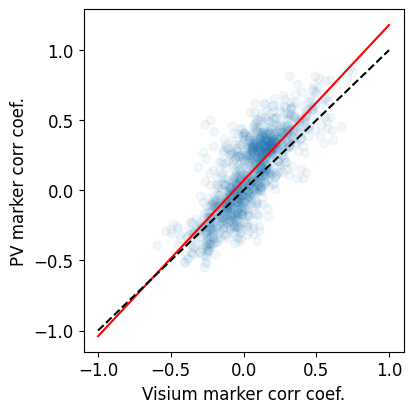

In [ ]:
plot_and_fit_model_to_marker_corr(visium,pseudovisium,morans_table_fr)

In [ ]:
from spatialAUC.spatialAUC import get_df_from_gmt, get_auc
import time
def process_data_gsea(adata_fullres, adata_pv, species):
    genes = list(set(adata_fullres.var_names) & set(adata_pv.var_names))

    if species == "Human":
        gene_sets = ['c5.all', 'c2.all']
        version = '2023.1.Hs'
    elif species == "Mouse":
        gene_sets = ['m5.all', 'm2.all']
        version = '2023.1.Mm'
    else:
        raise ValueError("Invalid species. Supported options are 'Human' and 'Mouse'.")

    df = get_df_from_gmt(gene_sets, version, genes,min_gene_ratio=0.5, min_gene_count=5)

    start_time_fullres = time.time()
    new_adata_fullres = get_auc(adata_fullres, df, axis=0)
    end_time_fullres = time.time()
    gsea1_time_fullres = end_time_fullres - start_time_fullres

    start_time_pv = time.time()
    new_adata_pv = get_auc(adata_pv, df, axis=0)
    end_time_pv = time.time()
    gsea1_time_pv = end_time_pv - start_time_pv

    return new_adata_fullres, new_adata_pv, gsea1_time_fullres, gsea1_time_pv

/usr/local/lib/python3.10/dist-packages/gseapy/msigdb.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  d = pd.read_html(resp.text)[0]
/usr/local/lib/python3.10/dist-packages/gseapy/msigdb.py:72: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  d = pd.read_html(resp.text)[0]


  0%|          | 0/100 [00:00<?, ?/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/100 [00:00<?, ?/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Fullres calculation - Time: 0.67
Pseudovisium calculation - Time: 1.50


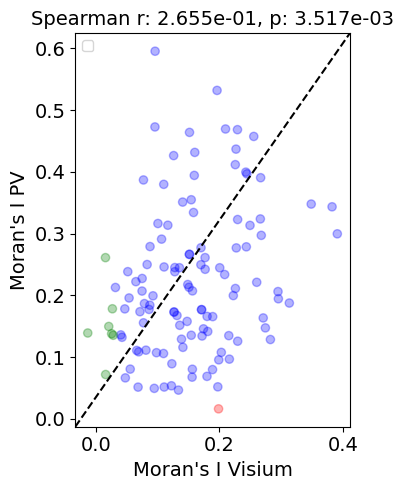

(0.2655241296552804,
 0.0035168512370318686,
                                                  gene  moranI_fr  moranI_pv  \
 0              GOBP_ADHESION_OF_SYMBIONT_TO_HOST_CELL   0.156140   0.080237   
 0                            GOBP_AUTOCRINE_SIGNALING   0.074798   0.227254   
 0   GOBP_CD4_POSITIVE_CD25_POSITIVE_ALPHA_BETA_REG...   0.131209   0.167336   
 0           GOBP_COLLAGEN_ACTIVATED_SIGNALING_PATHWAY   0.200473   0.244602   
 0   GOBP_COLLAGEN_ACTIVATED_TYROSINE_KINASE_RECEPT...   0.208447   0.233629   
 ..                                                ...        ...        ...   
 0   REACTOME_STAT3_NUCLEAR_EVENTS_DOWNSTREAM_OF_AL...   0.260386   0.221044   
 0                      REACTOME_SYNDECAN_INTERACTIONS   0.229191   0.468307   
 0    REACTOME_TNFS_BIND_THEIR_PHYSIOLOGICAL_RECEPTORS   0.270897   0.163320   
 0                            REACTOME_TRAIL_SIGNALING   0.110503   0.051399   
 0          REACTOME_VEGF_LIGAND_RECEPTOR_INTERACTIONS   0.189109   0.16547

In [ ]:
new_adata_fullres, new_adata_pv, gsea1_time_fullres, gsea1_time_pv = process_data_gsea(visium, pseudovisium, "Human")
new_adata_fullres, new_adata_pv, morans_table_fr_gsea, morans_table_pv_gsea, compare_morans_time_fr, compare_morans_time_pv = compare_morans(new_adata_fullres, new_adata_pv)
plot_moransi_comparison(morans_table_fr_gsea, morans_table_pv_gsea,"gsea")

In [ ]:
import subprocess

# Run the pip freeze command to get a list of installed packages
output = subprocess.check_output(['pip', 'freeze']).decode('utf-8').strip().split('\n')

print("Installed packages:")
for package in output:
    print(package)

Installed packages:
absl-py==1.4.0
access==1.1.9
adjustText==1.1.1
affine==2.4.0
aiobotocore==2.5.4
aiohttp==3.9.5
aioitertools==0.11.0
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
anndata==0.10.7
annotated-types==0.6.0
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_api_compat==1.6
array_record==0.5.1
arviz==0.15.1
asciitree==0.3.3
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.15.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.5.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
botocore==1.31.17
bqplot==0.12.43
branca==0.7.2
build==1.2.1
CacheControl==0.14.0
cachetools==5.3.3
catalogue==2.0.10
certifi==2024.2.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.16.0
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.2
colorcet==3.1.